# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
import numpy as np
from numpy import array

# Explore shape of training and test sets
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

# Explore number of classes
print("num classes: ", len(np.unique(y_train)))

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)
num classes:  100


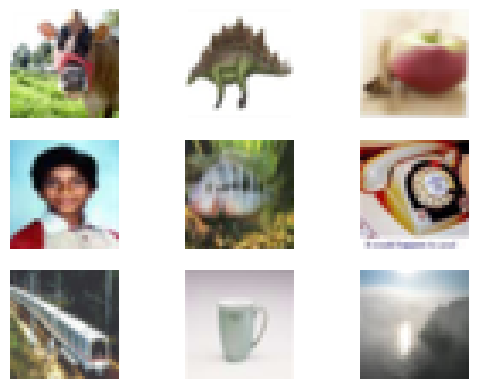

In [5]:
# Show first few examples from training set
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))

print("Before one-hot encoding: ", y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("After one-hot encoding: ", y_train[0])

Before one-hot encoding:  [19]
After one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [8]:
from sklearn.model_selection import train_test_split

# Split training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42
)

print("x_train_split: ", x_train_split.shape)
print("y_train_split: ", y_train_split.shape)
print("x_val_split: ", x_val_split.shape)
print("y_val_split: ", y_val_split.shape)

x_train_split:  (40000, 32, 32, 3)
y_train_split:  (40000, 100)
x_val_split:  (10000, 32, 32, 3)
y_val_split:  (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Build CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,668 (678.39 KB)

 Trainable params: 173,668 (678.39 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [10]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Compile the model

# Loss function: categorical_crossentropy
# This loss function measures how well a model predicts multi-class classification problems, so it should work for classifying images as well.
loss_function = categorical_crossentropy

# Optimizer: Adam
# This is useful because it's an adaptive learning rate optimizer that can automatically adjust learning rates based on the training results.
optimizer = Adam()

model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [17]:
# Train the model by fitting it

history = model.fit(
    x_train_split, # Training data
    y_train_split, # Training labels
    epochs=50, # Number of epochs -- I chose 50 due to timing constraints, but also the validation wasn't improving even though the training was
    batch_size=32, # Number of samples per batch
    validation_data=(x_val_split, y_val_split) # Validation set
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.3541 - loss: 2.4787 - val_accuracy: 0.3107 - val_loss: 2.7314
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.3815 - loss: 2.3473 - val_accuracy: 0.3226 - val_loss: 2.6848
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.4075 - loss: 2.2458 - val_accuracy: 0.3410 - val_loss: 2.6424
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.4277 - loss: 2.1370 - val_accuracy: 0.3313 - val_loss: 2.6853
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.4469 - loss: 2.0618 - val_accuracy: 0.3409 - val_loss: 2.6678
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.4623 - loss: 1.9886 - val_accuracy: 0.3541 - val_loss: 2.6131
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.4781 - loss: 1.9209 - val_accuracy: 0.3488 - val_loss: 2.6578
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.4942 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [20]:
# Evaluate the model results
loss, accuracy = model.evaluate(x_test, y_test)

# Accuracy: 31.2%
print("Test Accuracy: ", accuracy)

# Other Metric: Loss
# This metric mesures how high the errors are in the model by measuring the difference between the predicted probability distribution to the true probability distribution.
# Reason for selection: Examining the loss value allows us to understand how far off our prediction's classifications are, so we can better understand how to optimize the model.
# Value of metric: 5.69
# Interpretation: The closer to 0 the loss value is, the more exact the predictions are to the true values. This value means there is a lot of error in the model predictions.
print("Test Loss: ", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3166 - loss: 5.5810
Test Accuracy:  0.31200000643730164
Test Loss:  5.69163179397583


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

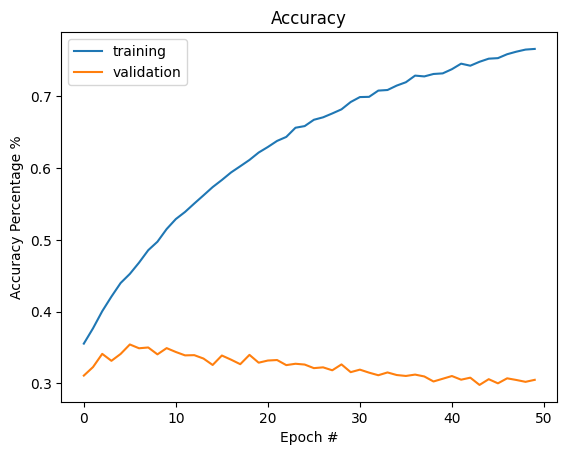

In [21]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy Percentage %')
plt.xlabel('Epoch #')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Results
# While the training dataset continues to have an improved accuracy over time, the validation dataset seems to indicate there is overfitting happening as the validation results are not improving given the large number of training parameters in this model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


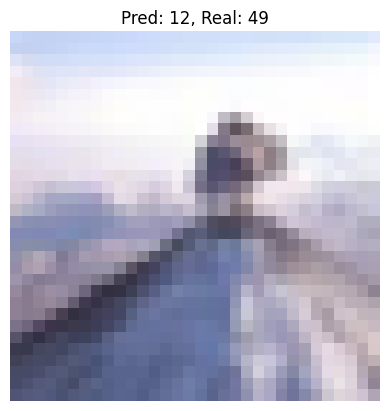

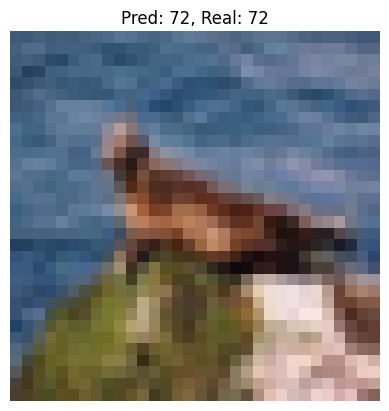

In [29]:
# Plot Example Images

# Get the predictions for the test data
predictions = model.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the misclassified samples themselves
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Plot 1 misclassified sample
plt.imshow(misclassified_samples[0], interpolation='nearest')
plt.title(f"Pred: {predicted_classes[misclassified_indices[0]]}, Real: {misclassified_labels[0]}")
plt.axis('off')
plt.show()

# Get the accurate samples
accurate_indices = np.where(predicted_classes == true_classes)[0]
accurate_samples = x_test[accurate_indices]
accurate_labels = np.argmax(y_test[accurate_indices], axis=1)

# Plot 1 accurate sample
plt.imshow(accurate_samples[0], interpolation='nearest')
plt.title(f"Pred: {predicted_classes[accurate_indices[0]]}, Real: {accurate_labels[0]}")
plt.axis('off')
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [23]:
# Advanced Optimizer
# Technique: Change the learning rate and apply a weight decay to try to prevent overfitting. Set AMSGrad to true to avoid suboptimal solution convergence.
# Since the results above demonstrated the possibility of overfitting, I tried a higher weight_decay value to help offset that.

optimizer_advanced = Adam(learning_rate=0.0001, weight_decay=0.01, amsgrad=True)

model.compile(
    loss=loss_function,
    optimizer=optimizer_advanced,
    metrics=['accuracy']
)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [24]:
# Retrain the model with advanced technique by fitting it on the same data sets

history_advanced = model.fit(
    x_train_split, # Training data
    y_train_split, # Training labels
    epochs=50, # Number of epochs -- I chose 50
    batch_size=32, # Number of samples per batch
    validation_data=(x_val_split, y_val_split) # Validation set
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 50ms/step - accuracy: 0.0217 - loss: 4.5223 - val_accuracy: 0.0516 - val_loss: 4.1978
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.0711 - loss: 4.1166 - val_accuracy: 0.1037 - val_loss: 3.9420
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.1134 - loss: 3.8887 - val_accuracy: 0.1277 - val_loss: 3.7775
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.1393 - loss: 3.7101 - val_accuracy: 0.1480 - val_loss: 3.6374
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.1554 - loss: 3.6012 - val_accuracy: 0.1641 - val_loss: 3.5395
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.1722 - loss: 3.5151 - val_accuracy: 0.1738 - val_loss: 3.4832
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.1858 - loss: 3.4307 - val_accuracy: 0.1899 - val_loss: 3.4080
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.1995 -

In [25]:
# Evaluate the model results
loss_advanced, accuracy_advanced = model.evaluate(x_test, y_test)
print("New Test Accuracy: ", accuracy_advanced)
print("New Test Loss: ", loss_advanced)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3547 - loss: 2.6011
New Test Accuracy:  0.3538999855518341
New Test Loss:  2.6034350395202637


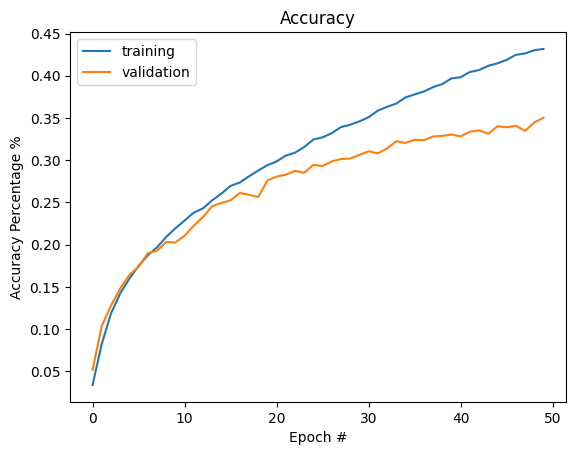

In [26]:
# Plot Accuracy
plt.plot(history_advanced.history['accuracy'])
plt.plot(history_advanced.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy Percentage %')
plt.xlabel('Epoch #')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


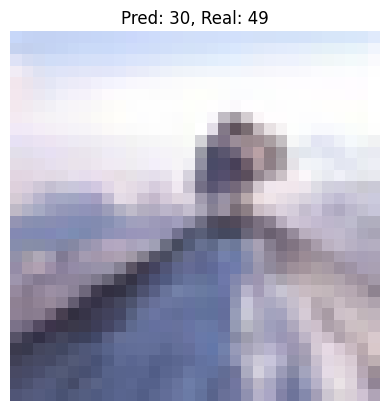

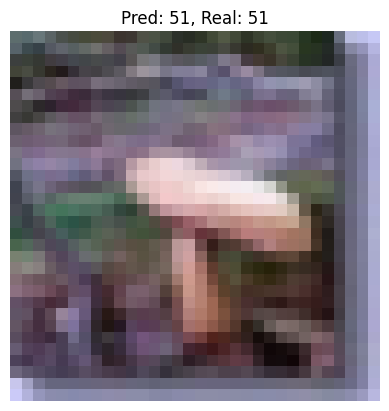

In [27]:
# Plot Example Images

# Get the predictions for the test data
predictions_advanced = model.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions_advanced, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the misclassified samples themselves
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Plot 1 misclassified sample
plt.imshow(misclassified_samples[0], interpolation='nearest')
plt.title(f"Pred: {predicted_classes[misclassified_indices[0]]}, Real: {misclassified_labels[0]}")
plt.axis('off')
plt.show()

# Get the accurate samples
accurate_indices = np.where(predicted_classes == true_classes)[0]
accurate_samples = x_test[accurate_indices]
accurate_labels = np.argmax(y_test[accurate_indices], axis=1)

# Plot 1 accurate sample
plt.imshow(accurate_samples[0], interpolation='nearest')
plt.title(f"Pred: {predicted_classes[accurate_indices[0]]}, Real: {accurate_labels[0]}")
plt.axis('off')
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The new model using advanced techniques and tuned hyperparameters did end up performing better than the original model created earlier. This is because we were able to see the results from the previous model and fine tune parameters that would help us with the overfitting. The advanced techniques also provide more complexity that help with the model's learning. There should be room for further improvement since this model has so many training parameters that can be optimized, if each one were tuned and if more time were given for training, we could likely see even better results. In the future, I could also try to use other classification optimizers with different parameters to see if it could better fit results.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.